In [1]:
# prompt: extract zipfile using zipfile module

import zipfile

with zipfile.ZipFile("/content/archive (22).zip", 'r') as zip_ref:
    zip_ref.extractall("/content")


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [16]:
df = pd.read_excel("/content/FlipMart Sales DATA set.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Shipping Mode,Customer ID,Customer Name,Segment,City,State,...,Market,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Cost,Quantity,Profit,Order Priority
0,1.0,AG-2012-TB112803-40909,2019-01-01,2019-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,Constantine,Constantine,...,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,35.46,2.0,106.140,Medium
1,2.0,IN-2012-JH159857-40909,2019-01-01,2019-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,9.72,3.0,36.036,Medium
2,3.0,HU-2012-AT73557-40909,2019-01-01,2019-01-05,Second Class,AT-73557,Annie Thurman,Consumer,Budapest,Budapest,...,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.120,8.17,4.0,29.640,High
3,4.0,IT-2012-EM14140124-40909,2019-01-01,2019-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,Stockholm,Stockholm,...,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,4.82,3.0,-26.055,High
4,5.0,IN-2012-JH159857-40909,2019-01-01,2019-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,4.70,5.0,37.770,Medium


In [17]:
df.shape

(51306, 22)

In [18]:
df.isnull().sum()

,0
Row ID,16
Order ID,16
Order Date,16
Ship Date,16
Shipping Mode,16
Customer ID,16
Customer Name,16
Segment,16
City,16
State,16


In [19]:
df.dropna(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, 0 to 51305
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  float64       
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Shipping Mode   51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Sub-Cat

In [22]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Shipping Cost,Quantity,Profit
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2021-05-11 17:09:47.202183424,2021-05-15 16:26:01.006044160,246.490581,26.478567,3.476545,28.610982
min,1.00000,2019-01-01 00:00:00,2019-01-03 00:00:00,0.444000,1.002000,1.000000,-6599.978000
25%,12823.25000,2020-06-19 00:00:00,2020-06-23 00:00:00,30.758625,2.610000,2.000000,0.000000
50%,25645.50000,2021-07-08 00:00:00,2021-07-12 00:00:00,85.053000,7.790000,3.000000,9.240000
75%,38467.75000,2022-05-22 00:00:00,2022-05-26 00:00:00,251.053200,24.450000,5.000000,36.810000
max,51290.00000,2022-12-31 00:00:00,2023-01-07 00:00:00,22638.480000,933.570000,14.000000,8399.976000
std,14806.29199,NaN,NaN,487.565361,57.251373,2.278766,174.340972


In [23]:
df = df.drop(columns=['Order ID','Customer Name','Product ID','Product ID','Customer ID'])
df.head(2)

,Row ID,Order Date,Ship Date,Shipping Mode,Segment,City,State,Country,Region,Market,Category,Sub-Category,Product Name,Sales,Shipping Cost,Quantity,Profit,Order Priority
0,1.0,2019-01-01,2019-01-06,Standard Class,Consumer,Constantine,Constantine,Algeria,North Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,35.46,2.0,106.140,Medium
1,2.0,2019-01-01,2019-01-08,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,9.72,3.0,36.036,Medium


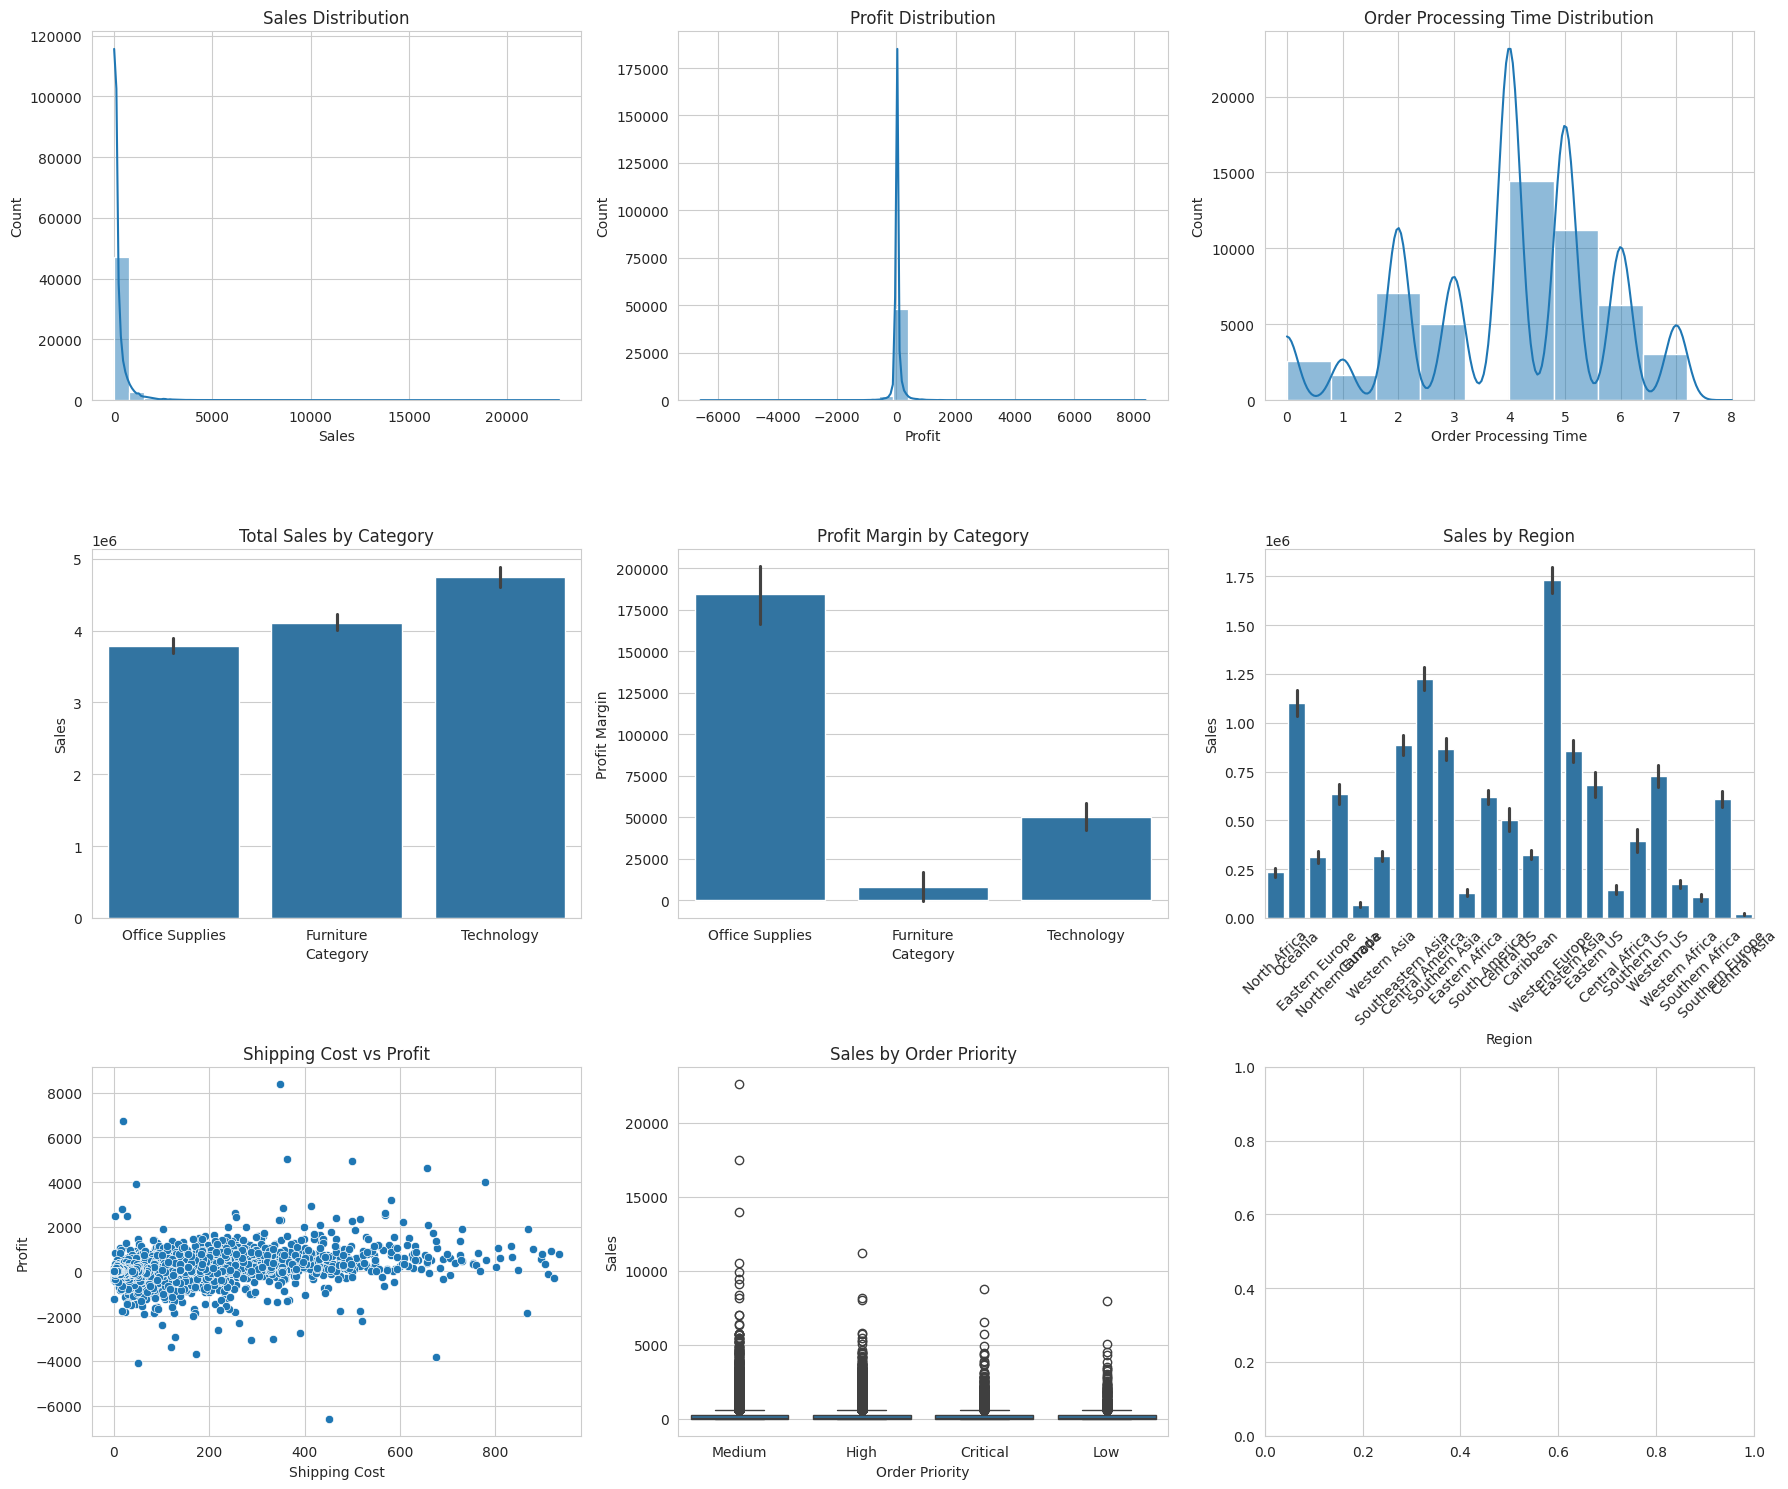

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates to datetime format for analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Feature Engineering
df['Order Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days  # Shipping time
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100  # Profit margin percentage

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Sales distribution
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Sales Distribution")

# Profit distribution
sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Profit Distribution")

# Order Processing Time distribution
sns.histplot(df['Order Processing Time'], bins=10, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Order Processing Time Distribution")

# Sales by Category
sns.barplot(x='Category', y='Sales', data=df, ax=axes[1, 0], estimator=sum)
axes[1, 0].set_title("Total Sales by Category")

# Profit Margin by Category
sns.barplot(x='Category', y='Profit Margin', data=df, ax=axes[1, 1], estimator=sum)
axes[1, 1].set_title("Profit Margin by Category")

# Sales by Region
sns.barplot(x='Region', y='Sales', data=df, ax=axes[1, 2], estimator=sum)
axes[1, 2].set_title("Sales by Region")
axes[1, 2].tick_params(axis='x', rotation=45)

# Shipping Cost vs Profit
sns.scatterplot(x='Shipping Cost', y='Profit', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Shipping Cost vs Profit")

# Sales by Order Priority
sns.boxplot(x='Order Priority', y='Sales', data=df, ax=axes[2, 1])
axes[2, 1].set_title("Sales by Order Priority")



# Adjust layout
plt.tight_layout()
plt.show()


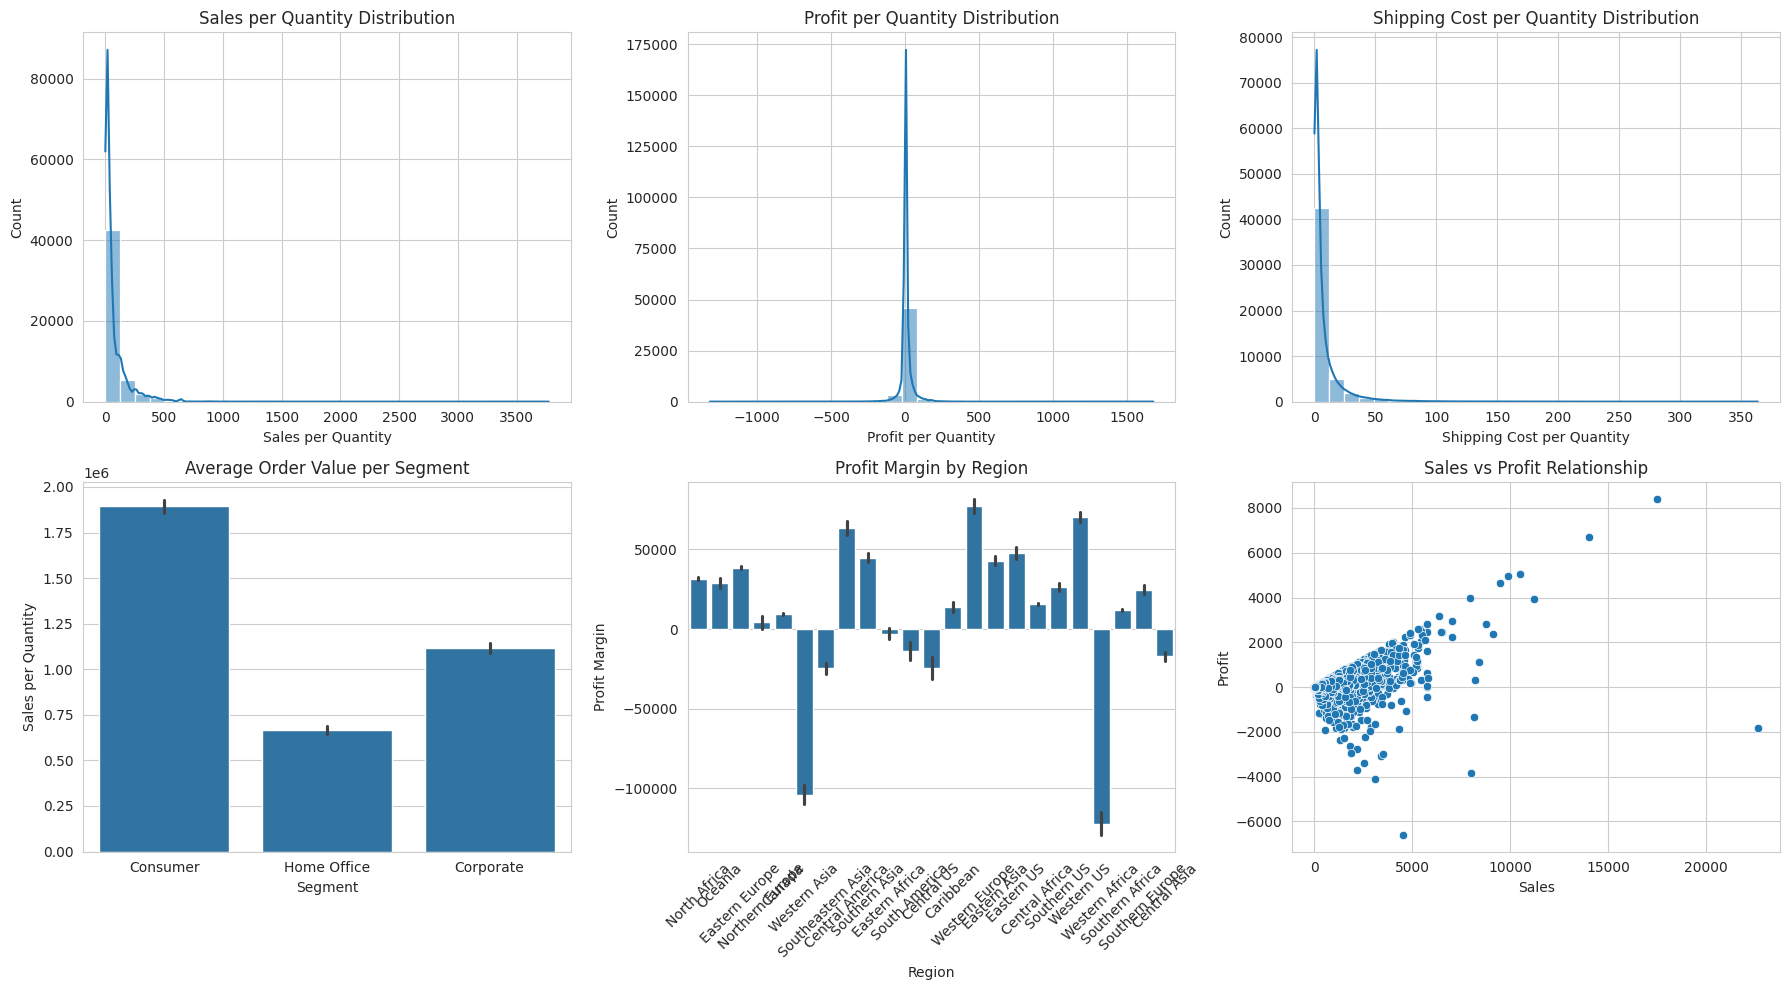

In [26]:
# Additional Feature Engineering
df['Sales per Quantity'] = df['Sales'] / df['Quantity']  # Average sales per unit
df['Profit per Quantity'] = df['Profit'] / df['Quantity']  # Average profit per unit
df['Shipping Cost per Quantity'] = df['Shipping Cost'] / df['Quantity']  # Shipping cost per unit

# Create subplots for new insights
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Sales per Quantity Distribution
sns.histplot(df['Sales per Quantity'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Sales per Quantity Distribution")

# Profit per Quantity Distribution
sns.histplot(df['Profit per Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Profit per Quantity Distribution")

# Shipping Cost per Quantity Distribution
sns.histplot(df['Shipping Cost per Quantity'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Shipping Cost per Quantity Distribution")

# Average Order Value per Segment
sns.barplot(x='Segment', y='Sales per Quantity', data=df, ax=axes[1, 0], estimator=sum)
axes[1, 0].set_title("Average Order Value per Segment")

# Profit Margin by Region
sns.barplot(x='Region', y='Profit Margin', data=df, ax=axes[1, 1], estimator=sum)
axes[1, 1].set_title("Profit Margin by Region")
axes[1, 1].tick_params(axis='x', rotation=45)

# Sales vs Profit Scatter Plot
sns.scatterplot(x='Sales', y='Profit', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Sales vs Profit Relationship")

# Adjust layout
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
<ipython-input-27-deb0c2e709bd>:33: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-deb0c2e709bd>:33: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyt

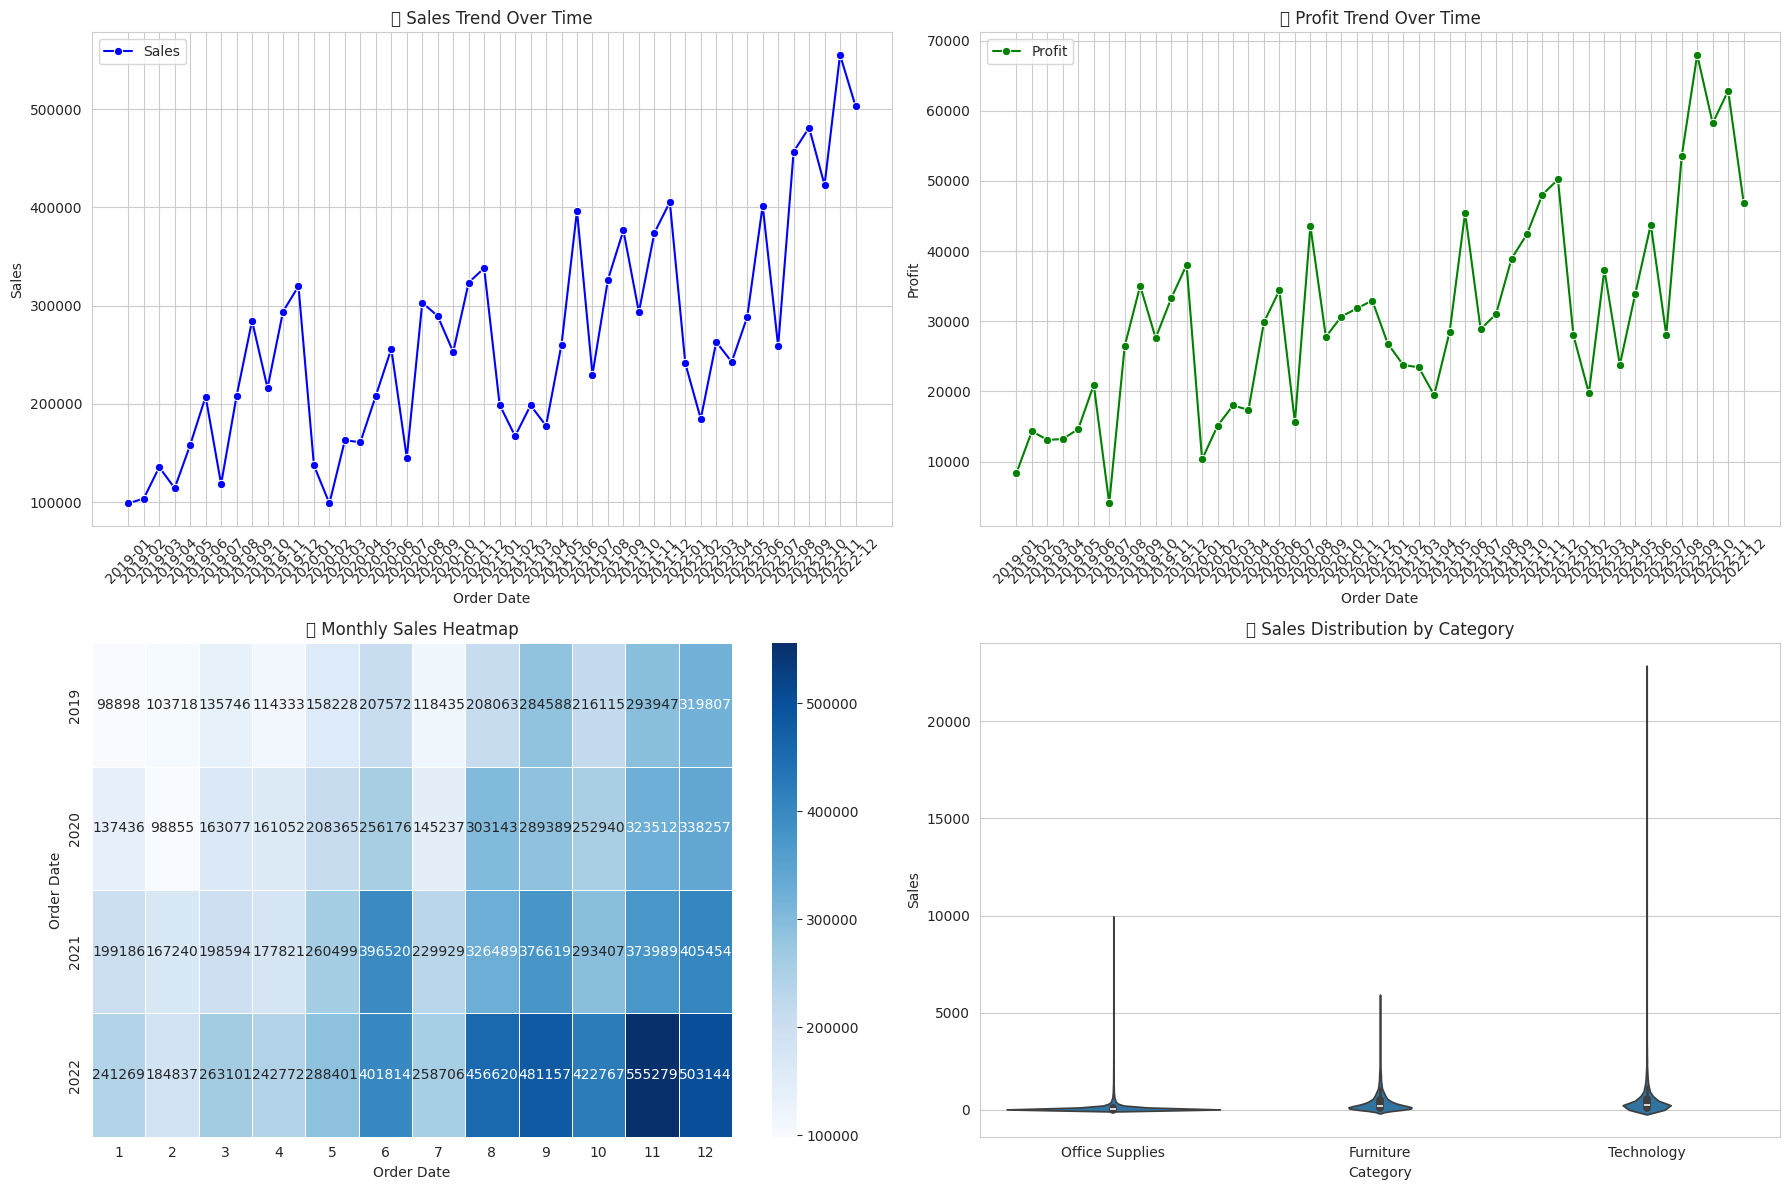

In [27]:
# Ensure Order Date is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group sales data by month
df_time_series = df.groupby(df['Order Date'].dt.to_period('M')).sum(numeric_only=True)
df_time_series.index = df_time_series.index.astype(str)

# Create subplots for time series analysis & advanced plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Time Series - Sales Trend Over Time (Line Plot)
sns.lineplot(x=df_time_series.index, y=df_time_series["Sales"], ax=axes[0, 0], marker="o", color="b", label="Sales")
axes[0, 0].set_title(" Sales Trend Over Time")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend()

# Time Series - Profit Trend Over Time (Line Plot)
sns.lineplot(x=df_time_series.index, y=df_time_series["Profit"], ax=axes[0, 1], marker="o", color="g", label="Profit")
axes[0, 1].set_title(" Profit Trend Over Time")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()

# Heatmap - Monthly Sales & Profit
df_pivot = df.pivot_table(index=df['Order Date'].dt.year, columns=df['Order Date'].dt.month, values='Sales', aggfunc='sum')
sns.heatmap(df_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title(" Monthly Sales Heatmap")

# Violin Plot - Sales Distribution by Category
sns.violinplot(x='Category', y='Sales', data=df, ax=axes[1, 1])
axes[1, 1].set_title(" Sales Distribution by Category")

# Adjust layout
plt.tight_layout()
plt.show()
